In [3]:
# Load the names dataset
with open("names.txt", "r") as f:
    words = f.read().splitlines()

In [4]:
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [16]:
max(len(word) for word in words)

15

In [17]:
words[0]

'emma'

In [39]:
combination_dict = {}

for word in words:
    chs = ["<S>"] + list(word) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
            bigram = (ch1,ch2)
            combination_dict[bigram] =  combination_dict.get(bigram, 0)+ 1
            

        
    

In [60]:
sorted(combination_dict.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [118]:
# lets keep it in a 2d array rather than a python dict
import torch

baigram = torch.zeros(size=(28,28), dtype=torch.int64)

baigram.shape , baigram.ndim, baigram.dtype


(torch.Size([28, 28]), 2, torch.int64)

In [114]:
stoi = {s:i for i,s in enumerate(sorted(list(set("".join(words)))))}
stoi["<S>"] = 26
stoi["<E>"] =  27
itos = {v:k for k,v in stoi.items()}
stoi 

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [122]:
for word in words:
    word = ["<S>"] + list(word) + ["<E>"]
    for ch1,ch2 in zip(word, word[1:]):
        # convert str to index
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ix1,ix2)
        baigram[ix1,ix2] += 1 
        

26 4
4 12
12 12
12 0
0 27
26 14
14 11
11 8
8 21
21 8
8 0
0 27
26 0
0 21
21 0
0 27
26 8
8 18
18 0
0 1
1 4
4 11
11 11
11 0
0 27
26 18
18 14
14 15
15 7
7 8
8 0
0 27
26 2
2 7
7 0
0 17
17 11
11 14
14 19
19 19
19 4
4 27
26 12
12 8
8 0
0 27
26 0
0 12
12 4
4 11
11 8
8 0
0 27
26 7
7 0
0 17
17 15
15 4
4 17
17 27
26 4
4 21
21 4
4 11
11 24
24 13
13 27
26 0
0 1
1 8
8 6
6 0
0 8
8 11
11 27
26 4
4 12
12 8
8 11
11 24
24 27
26 4
4 11
11 8
8 25
25 0
0 1
1 4
4 19
19 7
7 27
26 12
12 8
8 11
11 0
0 27
26 4
4 11
11 11
11 0
0 27
26 0
0 21
21 4
4 17
17 24
24 27
26 18
18 14
14 5
5 8
8 0
0 27
26 2
2 0
0 12
12 8
8 11
11 0
0 27
26 0
0 17
17 8
8 0
0 27
26 18
18 2
2 0
0 17
17 11
11 4
4 19
19 19
19 27
26 21
21 8
8 2
2 19
19 14
14 17
17 8
8 0
0 27
26 12
12 0
0 3
3 8
8 18
18 14
14 13
13 27
26 11
11 20
20 13
13 0
0 27
26 6
6 17
17 0
0 2
2 4
4 27
26 2
2 7
7 11
11 14
14 4
4 27
26 15
15 4
4 13
13 4
4 11
11 14
14 15
15 4
4 27
26 11
11 0
0 24
24 11
11 0
0 27
26 17
17 8
8 11
11 4
4 24
24 27
26 25
25 14
14 4
4 24
24 27
26 13
13

In [123]:
baigram

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6641],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          770, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

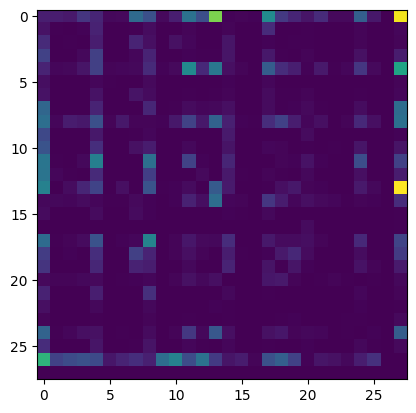

In [124]:
import matplotlib.pyplot as plt

plt.imshow(baigram)

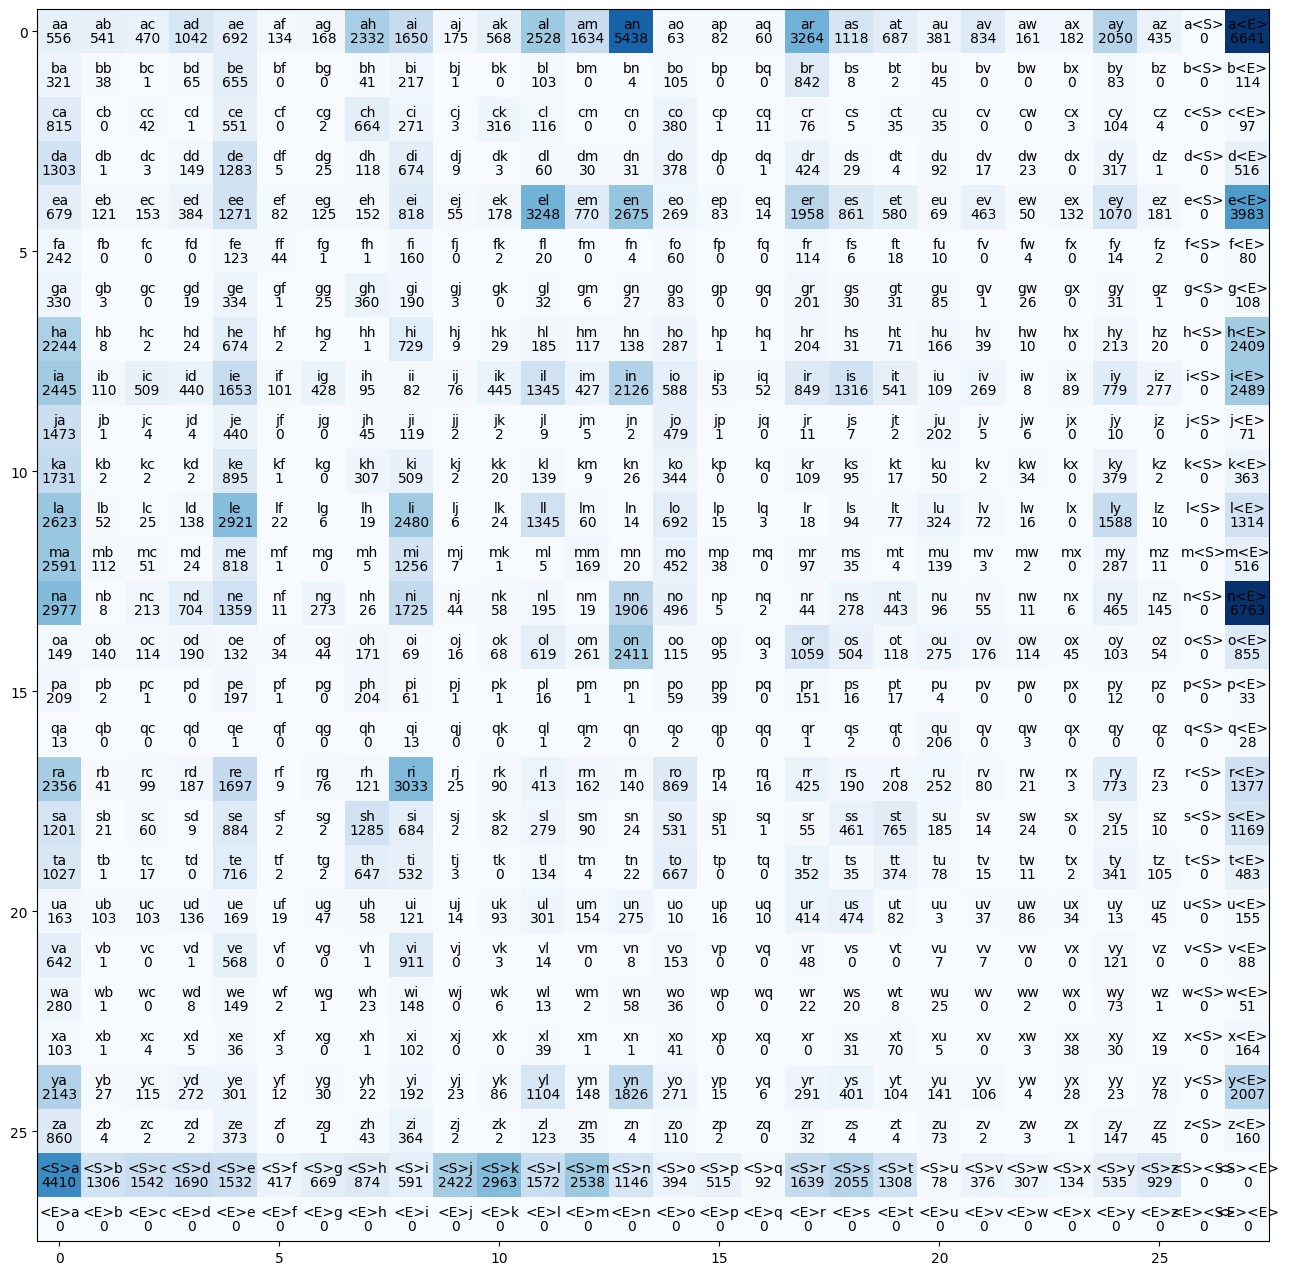

In [141]:
plt.figure(figsize=(16,16))
plt.imshow(baigram, cmap="Blues")
for i in range(28):
    for j in range(28):
        chrst = itos[i] + itos[j]
        plt.text(j,i, chrst, va= "bottom", ha= "center")
        plt.text(j,i, baigram[i,j].item(), va = "top", ha="center")